In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle

from simulations import *
from utils import *
from plot import *
from graspy.simulations import rdpg
from mgcpy.independence_tests.mgc.mgc import MGC
from mgcpy.benchmarks.simulations import circle_sim

from tqdm import tqdm_notebook as tqdm

In [2]:
def sine(x): return math.sin(2*x)

In [3]:
def mild_diff_square(x): return np.square(x-0.5) + 0.5

In [4]:
x = np.random.uniform(0, 1, size=1000)

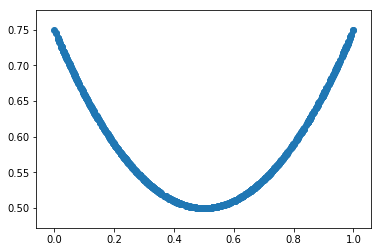

In [5]:
plt.scatter(x, np.vectorize(mild_diff_square)(x))

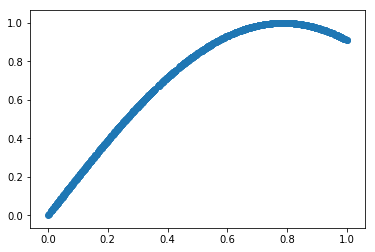

In [6]:
plt.scatter(x, np.vectorize(sine)(x))

In [7]:
with open('../data/rdpg_pvalue_diff_square_unbiased.pkl', 'rb') as f:
    pvalue_diff_square_unbiased = pickle.load(f)
with open('../data/rdpg_pvalue_linear_unbiased.pkl', 'rb') as f:
    pvalue_linear_unbiased = pickle.load(f)
with open('../data/rdpg_pvalue_null_unbiased.pkl', 'rb') as f:
    pvalue_null_unbiased = pickle.load(f)
with open('../data/rdpg_pvalue_exp_unbiased.pkl', 'rb') as f:
    pvalue_exp_unbiased = pickle.load(f)

In [8]:
with open('../data/rdpg_pvalue_diff_square_mgc.pkl', 'rb') as f:
    pvalue_diff_square_mgc = pickle.load(f)
with open('../data/rdpg_pvalue_linear_mgc.pkl', 'rb') as f:
    pvalue_linear_mgc = pickle.load(f)
with open('../data/rdpg_pvalue_null_mgc.pkl', 'rb') as f:
    pvalue_null_mgc = pickle.load(f)
with open('../data/rdpg_pvalue_exp_mgc.pkl', 'rb') as f:
    pvalue_exp_mgc = pickle.load(f)

In [9]:
def plot_two_pvalue_ecdf(pvalue_mc_dict, title):
    for name, pvalue_mc in pvalue_mc_dict.items():
        x = np.sort(pvalue_mc)
        y = np.arange(len(x))/float(len(x))
        plt.plot(x, y, label='ecdf of {}'.format(name))
    plt.xlabel('p-value')
    plt.ylabel('probability')
    plt.title(title)
    plt.plot([0, 1], [0, 1], label='y=x')
    plt.legend()
    plt.show()

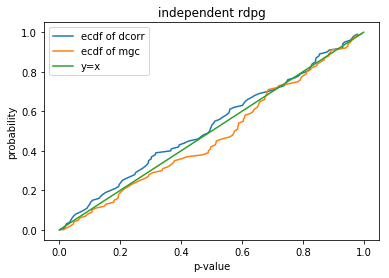

In [10]:
plot_two_pvalue_ecdf({'dcorr': pvalue_null_unbiased,
                  'mgc': pvalue_null_mgc}, 'independent rdpg')

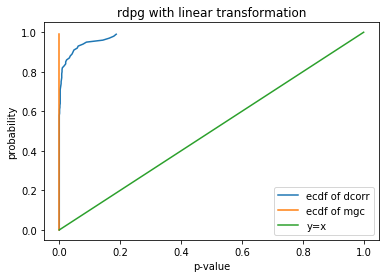

In [11]:
plot_two_pvalue_ecdf({'dcorr': pvalue_linear_unbiased,
                      'mgc': pvalue_linear_mgc}, 'rdpg with linear transformation')

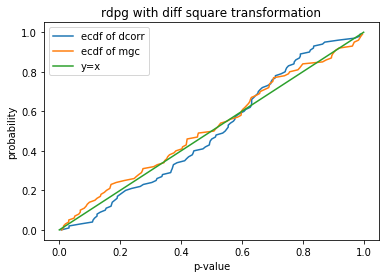

In [12]:
plot_two_pvalue_ecdf({'dcorr': pvalue_diff_square_unbiased,
                      'mgc': pvalue_diff_square_mgc}, 'rdpg with diff square transformation')

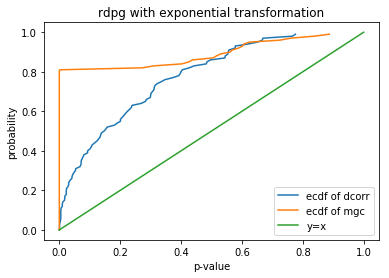

In [13]:
plot_two_pvalue_ecdf({'dcorr': pvalue_exp_unbiased,
                  'mgc': pvalue_exp_mgc}, 'rdpg with exponential transformation')

In [19]:
with open('../data/rdpg_power_dcorr.pkl', 'rb') as f:
    dcorr_power = pickle.load(f)
with open('../data/rdpg_power_mgc.pkl', 'rb') as f:
    mgc_power = pickle.load(f)
with open('../data/rdpg_power_pearson.pkl', 'rb') as f:
    pearson_power = pickle.load(f)   

In [20]:
def load_rdpg_power_as_dict(results):
    results_dict = {}
    for r in results:
        power = r[1]
        name = r[2]
        if name not in results_dict:
            results_dict[name] = []
        results_dict[name].append(power)
    return results_dict

In [21]:
mgc_power = load_rdpg_power_as_dict(mgc_power)
dcorr_power = load_rdpg_power_as_dict(dcorr_power)
pearson_power = load_rdpg_power_as_dict(pearson_power)

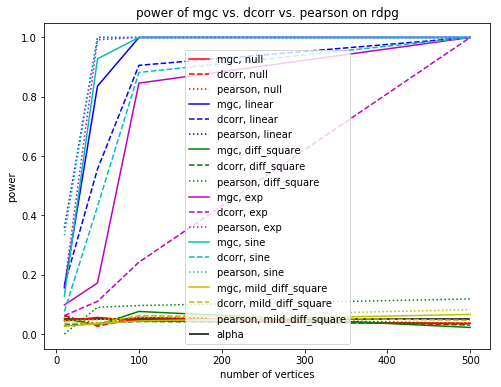

In [23]:
'''
Plot consistency of power of mgc vs. other tests for different settings of rho-SBM
'''
plt.figure(figsize=(8, 6))
num_vertices = [10, 50, 100, 500]
colors = ['r', 'b', 'g', 'm', 'c', 'y', 'k']
plt.xlabel('number of vertices')
plt.ylabel('power')
plt.title('power of mgc vs. dcorr vs. pearson on rdpg')

for i, name in enumerate(pearson_power.keys()):
    plt.plot(num_vertices, mgc_power[name], color=colors[i], label='mgc, {}'.format(name))
    plt.plot(num_vertices, dcorr_power[name], color=colors[i], linestyle='dashed', label='dcorr, {}'.format(name))
    plt.plot(num_vertices, pearson_power[name], color=colors[i], linestyle='dotted', label='pearson, {}'.format(name))
plt.hlines(y=0.05, xmin=num_vertices[0], xmax=num_vertices[-1], label='alpha')
plt.legend()
plt.show()